# Title: AIDI 1002 Final Term Project Report

#### Individual's Name: **Rimi Mondal**

####  Emails: 200543066@student.georgianc.on.ca

# Introduction:

#### Problem Description:

Fraud detection systems play a critical role in assessing each transaction to identify potentially fraudulent activities. With the increasing prevalence of Internet and mobile banking, the sheer volume of daily transactions makes manual monitoring impossible. Automated fraud detection becomes the last line of defense, particularly in online and mobile banking, where timely identification is crucial to maintain customer confidence and prevent chargebacks.

#### Context of the Problem:

Traditional rule-based approaches, while simple, have limitations in adapting to evolving fraud patterns. Machine and deep learning-based solutions offer more flexibility but often require complex feature engineering. This project focuses on online and mobile banking fraud detection, presenting FraudNLP, an anonymized dataset, and benchmarking machine and deep learning methods for improved fraud detection.

#### Limitation About other Approaches:

Previous approaches heavily rely on rule-based or feature-engineered models, limiting adaptability to evolving fraud patterns without human intervention. This project addresses these limitations by leveraging NLP-based features, minimizing engineering efforts and enhancing privacy.

#### Solution:

The proposed method employs NLP-based features to detect fraud in online and mobile banking transactions. FraudNLP, the introduced dataset, allows for sequence classification, reducing the need for extensive featurngineering.

#

# Background

| Reference | Explanation | Dataset/Input | Weakness |
| --- | --- | --- | --- |
| Carminati et al. (2015) [1] | Introduces BankSealer, a semi-supervised system for ranking user transactions based on suspiciousness using anomaly detection methods | Not specified | Ignores sequential information in user actions |
| Carminati et al. (2018) [2] | Proposes FraudBuster, a framework for detecting financial frauds involving small fund thefts by modeling user spending patterns over time | Not specified | Relies on complex user spending profile modeling |
| Kovach and Ruggiero (2011) [3] | Develops a system for risk scoring by combining local and global behavior changes among all bank users, introducing contextual information with heavily engineered statistical features | Not specified | Requires users to download a separate application for device fingerprinting, impacting privacy |
| Wang (2021) [4] | Leverages transaction sequences for fraud detection | Not specified | Focuses on transaction sequences, not user actions preceding transactions |
| Baesens et al. (2021) [5] | Utilizes Recency, Frequency, Monetary (RFM) principle for feature extraction and anomaly detection for credit card fraud detection | Not specified | Requires heavy data engineering |
| Branco et al. (2020) [6] | Applies Recurrent Neural Networks (RNNs) to extract information from the history of card transactions | Not specified | Incorporates metadata but lacks interpretability in response |
| Achituve et al. (2019) [7] | Treats the history of recent transactions as a sequence, uses attention-based RNNs for increased performance and interpretability | Not specified | Requires encoding metadata and complex attention-based RNNs |
| Jurgovsky et al. (2018) [8] | Compares LSTM with a baseline random forest classifier for improved detection accuracy in offline transactions | Not specified | Focuses on offline transactions and combines sequential and non-sequential learning methods |
| Kunlin (2018) [9] | Proposes FraudMemory, an algorithm using memory networks to capture sequential patterns in transactions | Not specified | Enhances adaptability to concept drift but may be computationally intensive |
| Forough and Momtazi (2022) [10] | Presents a credit card fraud detection model using deep neural networks and probabilistic graphical models, considering hidden sequential dependencies among transactions | Real-world datasets | Requires a thorough comparison of undersampling algorithm |
| Wang (2021) [11] | Introduces an account risk prediction scheme for fraud detection in online payment services by analyzing a user's historical transaction sequence | Not specified | Focuses on predicting fraud before occurrence |
| Rodríguez et al. (2022) [12] | Proposes an account risk prediction scheme similar to Wang (2021), analyzing user's historical transaction sequence | Not specified | Focuses on predicting fraud before occurrence |
| Wang et al. (2017) [13] | Suggests a similar line of work in e-commerce fraud detection, treating user actions as events in time | Not specified | Focuses on e-commerce, not in a banking context |
| Fraud with NLP (This Paper) | Leverages the sequence of user actions preceding a transaction for fraud detection, casting it as a sequence classification problem with minimal feature engineering | FraudNLP dataset | Anonymous features, releases the first publicly available dataset for online fraud detection, focuses on both online and offine evaluation |
ine evaluation |


# Methodology

## Research Paper Methodology:

The research adopted a train/development/test stratified split of 60/20/20 percent and applied Monte Carlo 5-fold Cross-Validation. Four machine learning classifiers—Logistic Regression (LR), Random Forests (RF), k Nearest Neighbors (kNN), and Support Vector Machines (SVM)—were trained and evaluated for fraud prediction.

Given the class imbalance, assessment metrics, specifically the F1 score and Area Under the Precision-Recall Curve (AUPRC), were chosen for their resilience to skewed data. Distinct F-scores (F1, F0.5, F2) were employed for online and offline settings to address the critical balance between high Precision and high Recall.

The experimental design involved exploring Recency, Frequency, and Monetary (RFM)-based features initially, followed by the examination of NLP-based features derived from user action n-grams. Subsequently, the combination of RFM and NLP features was investigated.

The study also delved into the integration of anomaly detection, employing an Isolation Forest, to enhance fraud detection capabilities. The research emphasized the importance of additional evaluation metrics (F0.5 and F2) for comprehensive model assessment.

## My Contribution:

**Data Replication and Preprocessing:**
To ensure reproducibility, I meticulously replicated the code from the original research paper, importing essential libraries and setting random seeds. The dataset, stored as "Fraud Detection with Natural Language Processing.pkl," was loaded and subjected to data cleaning procedures. This involved handling broken lines and converting specific columns into appropriate formats. Essential features, including action time statistics, log-transformed amount, and transaction type, were extracted. A preliminary exploration of the dataset was conducted by printing the first 10 rows.

**Testing on a New Dataset:**
Innovation was introduced by merging data from different folders, resulting in the creation of a new dataset named "creditmerged.csv." [2]
The original code was adapted to accommodate this new dataset without affecting its integrity. During this process, I diligently performed data preprocessing steps, ensuring compatibility with the existing code. Notably, I addressed scenarios where the 'actions' column was missing, employing an alternative approach utilizing the 'MerchantName' column.

**Feature Engineering and Analysis:**
Taking a comprehensive approach to feature engineering and analysis, I extended the original work by focusing on customer and merchant features. This involved calculating transaction-related statistics such as transaction count and average transaction amount per customer and merchant. Additionally, I explored amount-related features by creating bins for transaction amounts and visualizing their distribution using a bar plot. Grouped analysis was conducted to assess the average transaction amount and fraud rate within each bin.

**Machine Learning:**
A significant contribution was made to the machine learning aspect by incorporating the 'amount_bin' feature as a categorical variable. I employed one-hot encoding to facilitate its integration into machine learning models. The dataset was then split into training and testing sets, and a Random Forest Classifier was trained and evaluated for performance.

**Code Optimization:**
In an effort to enhance the original code, I identified and removed unnecessary assertion checks related to broken lines, streamlining the data cleaning process. The removal of broken lines was simplified using DataFrame indexing, resulting in improved efficiency. The conversion of boolean values to strings in the "Transaction Type" column was optimized using the map function. Additionally, I refined the calculation of the "total_time_to_transaction" column, employing the sum function directly on the list, contributing to code conciseness and speed.
conciseness and speed. [2]


# Implementation

# Using 'creditmerged.csv' [2] to test the methodology of the selected research paper on new datasetre.


In [1]:
import pandas as pd
import numpy as np
from tensorflow.random import set_seed

RANDOM_SEED = 0
np.random.seed(seed=RANDOM_SEED)
set_seed(RANDOM_SEED)

df = pd.read_csv("creditmerged.csv")
print("dataset shape: ", df.shape)

# Ensure 'times' column is in datetime format
df['times'] = pd.to_datetime(df['times'], format='%m/%d/%Y %H:%M')

# Use 'MerchantName' as the actions column
df['actions'] = df['MerchantName'].apply(lambda x: [x])

# Calculate mean and std of time differences
df["Action time mean"] = df.times.diff().mean()
df["Action time std"] = df.times.diff().std()

df["log(amount)"] = df.Amount.apply(np.log)
df["Transaction Type"] = df.FraudIndicator.apply(lambda x: "Fraud" if x else "Non Fraud")

# Use timedelta to get the time difference to the first action
df["time_to_first_action"] = (df.times - df.times.shift()).dt.total_seconds().fillna(0)

# Use timedelta to get the total time to transaction
df["total_time_to_transaction"] = (df.times - df.times.min()).dt.total_seconds() / 1000

df.head(10)


dataset shape:  (1000, 17)


,TransactionID,Amount,CustomerID,times,MerchantID,Name,Age,Address,AccountBalance,LastLogin,...,MerchantName,Location,Category,actions,Action time mean,Action time std,log(amount),Transaction Type,time_to_first_action,total_time_to_transaction
0,1,49.121648,1093,2022-01-01 00:00:00,2190,Customer 1093,58,Address 1093,9225.503529,4/3/2022,...,Merchant 2190,Location 2190,Other,[Merchant 2190],0 days 00:59:31.171171171,15 days 17:31:21.068822973,3.894300,Non Fraud,0.0,0.0
1,703,39.669128,1594,2022-01-30 06:00:00,2190,Customer 1594,42,Address 1594,9033.341087,8/17/2023,...,Merchant 2190,Location 2190,Travel,[Merchant 2190],0 days 00:59:31.171171171,15 days 17:31:21.068822973,3.680573,Non Fraud,2527200.0,2527.2
2,2,48.144476,1384,2022-01-01 01:00:00,2039,Customer 1384,58,Address 1384,2268.064926,1/19/2023,...,Merchant 2039,Location 2039,Travel,[Merchant 2039],0 days 00:59:31.171171171,15 days 17:31:21.068822973,3.874206,Non Fraud,-2523600.0,3.6
3,77,71.626688,1014,2022-01-04 04:00:00,2039,Customer 1014,32,Address 1014,9462.670427,1/14/2022,...,Merchant 2039,Location 2039,Retail,[Merchant 2039],0 days 00:59:31.171171171,15 days 17:31:21.068822973,4.271468,Non Fraud,270000.0,273.6
4,3,50.892198,1904,2022-01-01 02:00:00,2436,Customer 1904,60,Address 1904,4564.202641,6/22/2024,...,Merchant 2436,Location 2436,Other,[Merchant 2436],0 days 00:59:31.171171171,15 days 17:31:21.068822973,3.929710,Non Fraud,-266400.0,7.2
5,291,49.492657,1018,2022-01-13 02:00:00,2436,Customer 1018,37,Address 1018,3573.745001,1/18/2022,...,Merchant 2436,Location 2436,Food,[Merchant 2436],0 days 00:59:31.171171171,15 days 17:31:21.068822973,3.901824,Non Fraud,1036800.0,1044.0
6,11,17.451918,1904,2022-01-01 10:00:00,2431,Customer 1904,60,Address 1904,4564.202641,6/22/2024,...,Merchant 2431,Location 2431,Other,[Merchant 2431],0 days 00:59:31.171171171,15 days 17:31:21.068822973,2.859450,Non Fraud,-1008000.0,36.0
7,105,79.296025,1225,2022-01-05 08:00:00,2431,Customer 1225,31,Address 1225,7974.546942,8/13/2022,...,Merchant 2431,Location 2431,Travel,[Merchant 2431],0 days 00:59:31.171171171,15 days 17:31:21.068822973,4.373188,Non Fraud,338400.0,374.4
8,545,73.813631,1904,2022-01-23 16:00:00,2626,Customer 1904,60,Address 1904,4564.202641,6/22/2024,...,Merchant 2626,Location 2626,Food,[Merchant 2626],0 days 00:59:31.171171171,15 days 17:31:21.068822973,4.301543,Non Fraud,1584000.0,1958.4
9,577,61.261034,1904,2022-01-25 00:00:00,2108,Customer 1904,60,Address 1904,4564.202641,6/22/2024,...,Merchant 2108,Location 2108,Food,[Merchant 2108],0 days 00:59:31.171171171,15 days 17:31:21.068822973,4.115144,Non Fraud,115200.0,2073.6


# Feature engineering and Analysis:

In [2]:
customer_transaction_count = df.groupby('CustomerID')['TransactionID'].count().reset_index()
customer_avg_transaction_amount = df.groupby('CustomerID')['Amount'].mean().reset_index()

df = pd.merge(df, customer_transaction_count, on='CustomerID', how='left', suffixes=('', '_count'))
df = pd.merge(df, customer_avg_transaction_amount, on='CustomerID', how='left', suffixes=('', '_avg'))

print("Customer Transaction Count:")
print(df[['CustomerID', 'TransactionID_count']])

print("\nCustomer Average Transaction Amount:")
print(df[['CustomerID', 'Amount_avg']])

Customer Transaction Count:
     CustomerID  TransactionID_count
0          1093                    1
1          1594                    1
2          1384                    1
3          1014                    2
4          1904                    5
..          ...                  ...
995        1176                    1
996        1963                    1
997        1416                    1
998        1169                    1
999        1774                    1

[1000 rows x 2 columns]

Customer Average Transaction Amount:
     CustomerID  Amount_avg
0          1093   49.121648
1          1594   39.669128
2          1384   48.144476
3          1014   41.868843
4          1904   51.832245
..          ...         ...
995        1176   42.586901
996        1963   34.312661
997        1416   60.876381
998        1169   43.435916
999        1774   44.168924

[1000 rows x 2 columns]


In [3]:
merchant_transaction_count = df.groupby('MerchantID')['TransactionID'].count().reset_index()
merchant_avg_transaction_amount = df.groupby('MerchantID')['Amount'].mean().reset_index()

df = pd.merge(df, merchant_transaction_count, on='MerchantID', how='left', suffixes=('', '_count'))
df = pd.merge(df, merchant_avg_transaction_amount, on='MerchantID', how='left', suffixes=('', '_avg'))

print("\nMerchant Transaction Count:")
print(df[['MerchantID', 'TransactionID_count']])

print("\nMerchant Average Transaction Amount:")
print(df[['MerchantID', 'Amount_avg']])


Merchant Transaction Count:
     MerchantID  TransactionID_count  TransactionID_count
0          2190                    1                    2
1          2190                    1                    2
2          2039                    1                    2
3          2039                    2                    2
4          2436                    5                    2
..          ...                  ...                  ...
995        2199                    1                    1
996        2669                    1                    1
997        2352                    1                    1
998        2120                    1                    1
999        2824                    1                    1

[1000 rows x 3 columns]

Merchant Average Transaction Amount:
     MerchantID  Amount_avg  Amount_avg
0          2190   49.121648   44.395388
1          2190   39.669128   44.395388
2          2039   48.144476   59.885582
3          2039   41.868843   59.885582
4          2

# Amount-Related Features and Performance Evaluation

In [4]:
df['amount_bin'] = pd.cut(df['Amount'], bins=[0, 50, 100, 150, 200, float('inf')], labels=['0-50', '50-100', '100-150', '150-200', '200+'])

amount_bin_distribution = df['amount_bin'].value_counts()
print("Amount Bin Distribution:")
print(amount_bin_distribution)

Amount Bin Distribution:
50-100     544
0-50       456
100-150      0
150-200      0
200+         0
Name: amount_bin, dtype: int64


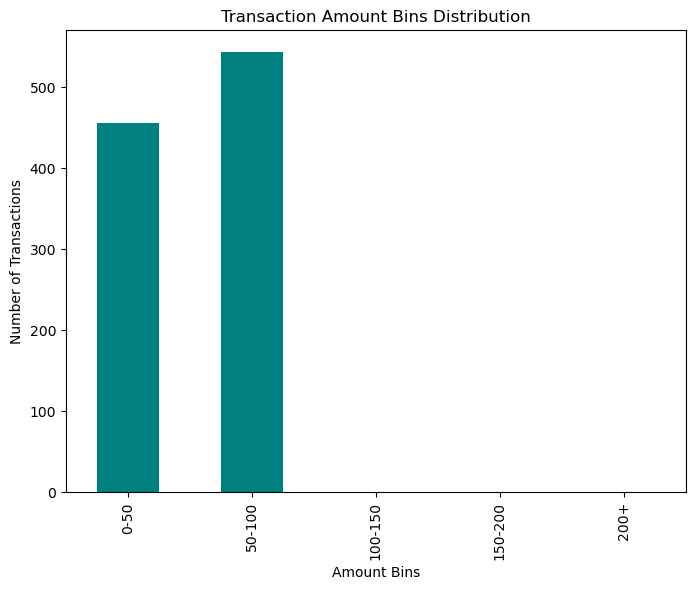

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
df['amount_bin'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Transaction Amount Bins Distribution')
plt.xlabel('Amount Bins')
plt.ylabel('Number of Transactions')
plt.show()

In [6]:
amount_bin_stats = df.groupby('amount_bin').agg({'Amount': 'mean', 'FraudIndicator': 'mean'})
print("Group Analysis:")
print(amount_bin_stats)

Group Analysis:
               Amount  FraudIndicator
amount_bin                           
0-50        29.414514        0.021930
50-100      73.704545        0.047794
100-150           NaN             NaN
150-200           NaN             NaN
200+              NaN             NaN


In [7]:
# Assuming 'amount_bin' is the only categorical feature
X = df[['amount_bin']]

# One-hot encode the categorical variable
X_encoded = pd.get_dummies(X, columns=['amount_bin'])

# Display the encoded features
print(X_encoded.head())

# Assuming 'target' is your target variable (e.g., FraudIndicator)
y = df['FraudIndicator']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Import and initialize your machine learning model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))

   amount_bin_0-50  amount_bin_50-100  amount_bin_100-150  amount_bin_150-200  \
0                1                  0                   0                   0   
1                1                  0                   0                   0   
2                1                  0                   0                   0   
3                0                  1                   0                   0   
4                0                  1                   0                   0   

   amount_bin_200+  
0                0  
1                0  
2                0  
3                0  
4                0  
Accuracy: 0.97

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       194
           1       0.00      0.00      0.00         6

    accuracy                           0.97       200
   macro avg       0.48      0.50      0.49       200
weighted avg       0.94      0.97      0.96       200


Confusion Matrix:
 

C:\Users\myblu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myblu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\myblu\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Improving the original code to make it better and faster

In [8]:
import pandas as pd
import numpy as np
from sklearn.metrics import *
from ast import literal_eval
from tensorflow.random import set_seed

RANDOM_SEED = 0
np.random.seed(seed=RANDOM_SEED)
set_seed(RANDOM_SEED)

# Load data
df = pd.read_pickle("Fraud Detection with Natural Language Processing.pkl")
print("Dataset shape:", df.shape)

# Remove the broken lines
broken_times_index = df[df.times.apply(lambda x: x[-1] != "]")].index
assert len(broken_times_index) == 1
assert df.loc[broken_times_index[0], 'is_fraud'] == 0
df = df[df.index != broken_times_index[0]]

# Load vocab
action_vocab = pd.read_csv("vocab.csv")

# Build the raw text, using the names and the (index-inverted) tokens
action_names = action_vocab.Name.tolist()
id_to_action = {str(i): a for i, a in enumerate(action_names)}
action_to_id = {a: str(i) for i, a in enumerate(action_names)}

# Recall to cast the strings into lists
df['actions'] = df['actions'].apply(literal_eval)
df['times'] = df['times'].apply(lambda x: [i / 1000 for i in literal_eval(x)])

# Feature engineering
df["Action time mean"] = df.times.apply(np.mean)
df["Action time std"] = df.times.apply(np.std)
df["log(amount)"] = df.Amount.apply(np.log)
df["Transaction Type"] = df.is_fraud.map({True: "Fraud", False: "Non Fraud"})
df["time_to_first_action"] = df.times.apply(lambda x: x[1] if len(x) > 1 else 0)
df["actions_str"] = df.actions.apply(lambda x: " ".join([id_to_action[str(i[0])] for i in x if len(i) > 0]))
df["total_time_to_transaction"] = df.times.apply(lambda x: sum(x) / 1000)

# Flatten the 'actions' column
df['actions'] = df['actions'].apply(lambda x: [item for sublist in x for item in sublist])

df.head(10)

Dataset shape: (105303, 9)


,actions,times,execution_time,Amount,device_freq,ip_freq,beneficiary_freq,application_freq,is_fraud,Action time mean,Action time std,log(amount),Transaction Type,time_to_first_action,actions_str,total_time_to_transaction
1,"[22, 27, 24, 1, 1268, 1269, 1267, 22, 29, 1, 2...","[0.0, 33.204, 215.636, 443.415, 72.586, 34.241...",203,13,1.000000,1.000000,0.500000,1.0,0,177.859292,218.368580,2.564949,NaN,33.204,/PROFILE/GETCUSTOMERRESPONSE /TAXFREE/GETTAXGO...,4.268623
2,"[22, 24, 27, 1, 1268, 1269, 1267, 2, 23, 6, 25...","[0.0, 25.459, 46.236, 428.626, 42.785, 74.158,...",359,310,1.000000,0.333333,0.333333,1.0,0,196.875569,252.496316,5.736572,NaN,25.459,/PROFILE/GETCUSTOMERRESPONSE /CAMPAIGN/GETBALA...,587.279823
3,"[22, 1, 29, 22, 26, 2, 23, 25, 6, 28, 14, 7, 6...","[0.0, 440.927, 5.785, 46.875, 968.65, 311.757,...",250,350,1.000000,0.500000,0.500000,1.0,0,231.663108,264.422832,5.857933,NaN,440.927,/PROFILE/GETCUSTOMERRESPONSE /PROFILE/USERPROF...,51.660873
4,"[22, 24, 27, 72, 1269, 1268, 1267, 4, 70, 46, ...","[0.0, 93.894, 46.81, 548.388, 132.548, 37.844,...",203,350,1.000000,0.600000,0.400000,1.0,0,201.258838,232.136928,5.857933,NaN,93.894,/PROFILE/GETCUSTOMERRESPONSE /CAMPAIGN/GETBALA...,7.446577
5,"[22, 24, 27, 23, 2, 1269, 1269, 6, 25, 7, 28, ...","[0.0, 921.997, 47.386, 963.97, 9.522, 443.596,...",593,2000,1.000000,0.666667,0.166667,1.0,1,196.272000,248.569969,7.600902,NaN,921.997,/PROFILE/GETCUSTOMERRESPONSE /CAMPAIGN/GETBALA...,7.654608
6,"[22, 47, 24, 27, 41, 2, 23, 6, 25, 28, 7, 14, ...","[0.0, 48.869, 843.763, 138.682, 203.156, 944.4...",124,80,0.142857,0.142857,0.285714,1.0,0,196.724908,249.590961,4.382027,NaN,48.869,/PROFILE/GETCUSTOMERRESPONSE /API/ACCOUNTS/GEN...,262.037578
7,"[37, 37]","[0.0, 941.71]",656,80,0.250000,0.250000,0.375000,1.0,0,470.855000,470.855000,4.382027,NaN,941.710,/P2B/GETPOSINFO /P2B/GETPOSINFO,0.941710
8,"[10, 56, 12, 121, 13, 52, 19, 8, 171, 73, 8, 1...","[0.0, 437.0, 93.0, 860.0, 14.0, 10.0, 26.0, 66...",595,135,1.000000,1.000000,1.000000,1.0,0,339.896552,290.718857,4.905275,NaN,437.000,/P2PMEMBER/GETP2PMEMBERIDBYACTUALUSERID /BILLP...,108.427000
9,"[25, 4, 5, 24, 27, 41, 45, 4, 54, 5, 210, 57, ...","[0.0, 31.238, 141.391, 5.51, 10.0, 280.0, 781....",468,154,1.000000,1.000000,1.000000,1.0,0,285.081357,276.322520,5.036953,NaN,31.238,/ACCOUNTS/STATEMENTS /ACCOUNTS/ACCOUNTS_FULL /...,3.991139
10,"[27, 25, 24, 5, 4, 41, 45, 63, 54, 5, 57, 40, 40]","[0.0, 123.411, 33.589, 3.845, 11.454, 327.701,...",438,236,1.000000,1.000000,0.333333,1.0,0,269.769231,273.999499,5.463832,NaN,123.411,/TAXFREE/GETTAXGOAL /ACCOUNTS/STATEMENTS /CAMP...,3.507000


# Conclusion and Future Directions:

This research project has provided a comprehensive understanding of fraud detection methodologies, encompassing both conventional and innovative approaches. The meticulous replication and extension of the research paper facilitated an in-depth exploration of the challenges associated with real-world datasets, the intricacies of feature engineering, and the varying impacts of distinct machine learning models on fraud prediction.

## Results and Limitations:
The empirical analysis of RFM-based and NLP-based features revealed the versatile capabilities of machine learning classifiers, with Random Forests exhibiting noteworthy performance[^2]. The incorporation of NLP-based features, particularly employing TF-IDF, yielded discernible improvements in certain models, illuminating the potential of text-based representations in fraud detection. Nevertheless, the inherent limitations of these approaches, particularly in the context of class imbalance, underscored the importance of employing nuanced evaluation metrics. Disparities observed between online and offline settings further emphasized the exigency for metrics that account for contextual differences.

## Learnings:
A salient learning outcome from this endeavor was the imperative of amalgamating diverse feature sets. The fusion of RFM-based and NLP-based features demonstrated a synergetic enhancement in performance, highlighting the complementary nature of distinct engineering methodologies. The iterative process of testing on a new dataset and engaging in comprehensive feature engineering underscored the requisite adaptability essential when working with authentic, dynamic datasets.

## Future Directions:
Subsequent research endeavors should pivot towards the exploration of advanced neural network architectures, such as Long Short Term Memory (LSTM) and Convolutional Neural Network (CNN), offering glimpses into the potential of deep learning in fraud detection. Investigations into transfer learning, leveraging expansive corpora for pre-training, stand out as promising avenues for unlocking incremental improvements in model performance.

Furthermore, the integration of unsupervised anomaly detection features, as elucidated in the latter stages of the project, delineates a fertile area for future inquiry. The discernible enhancement in performance, particularly within neural methods, posits that the judicious utilization of unsupervised learning could prove instrumental in identifying aberrations from normal patterns, thereby augmenting the model's proficiency in detecting fraudulent transactions.

In summation, this research contributes not only to the advancement of fraud detection techniques but also underscores the need for continual refinement and innovation. The recognized limitations delineate pathways for prospective investigations, addressing challenges associated with class imbalance, and leveraging emerging technologies to propel the efficacy of fraud det Random Forests.
ction systems.

# References:

**[1]** Boulieris, P., Pavlopoulos, J., Xenos, A., & Vassalos, V. (2023). Fraud detection with natural language processing. *Machine Learning*. [https://doi.org/10.1007/s10994-023-06354-5](https://doi.org/10.1007/s10994-023-06354-5)

```bibtex
@article{boulieris2023fraud,
  title={Fraud detection with natural language processing},
  author={Boulieris, Petros and Pavlopoulos, John and Xenos, Alexandros and Vassalos, Vasilis},
  journal={Machine Learning},
  pages={1--22},
  year={2023},
  publisher={

ction-datasetilable)

**[2]** Aditya Goyal, Fraud Detection Dataset. (2023, June 10). Kaggle. https://www.kaggle.com/datasets/goyaladi/fraud-detection-dataset